In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from mlxtend.frequent_patterns import apriori, association_rules

In [4]:
purchase_data=pd.read_csv(r"/workspace/Projects/Customer_Purchase_Analysis/shopping_trends.csv")
purchase_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
purchase_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [6]:
purchase_data[["Age","Purchase Amount (USD)","Review Rating", "Previous Purchases"]].describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


In [7]:
print("Looking for null values:")
purchase_data.isnull().sum()


Looking for null values:


Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [8]:
print("Sales By Category:")
sales_grouped= purchase_data.groupby("Category")["Purchase Amount (USD)"].agg(['sum', 'count', 'mean'])
sales_grouped

Sales By Category:


,sum,count,mean
Category,,,
Accessories,74200,1240,59.838710
Clothing,104264,1737,60.025331
Footwear,36093,599,60.255426
Outerwear,18524,324,57.172840


In [9]:
print("Top Selling Products:")
top_products = purchase_data.groupby('Item Purchased')['Purchase Amount (USD)'].agg(['sum', 'count']).sort_values('sum', ascending=False)
top_products.sample(4)

Top Selling Products:


,sum,count
Item Purchased,,
Sandals,9200,160
T-shirt,9248,147
Hoodie,8767,151
Sunglasses,9649,161


In [10]:
from datetime import datetime, timedelta

end_date = datetime(2025, 5, 11) 
start_date = end_date - timedelta(days=90)
transaction_dates = [start_date + (end_date - start_date) * np.random.random() for _ in range(len(purchase_data))]
purchase_data['Transaction_Date'] = transaction_dates

In [11]:
# Sales trends over time
purchase_data['Month_Day'] = purchase_data['Transaction_Date'].dt.strftime('%m-%d')
monthly_sales = purchase_data.groupby('Month_Day')['Purchase Amount (USD)'].sum().reset_index()
monthly_sales


,Month_Day,Purchase Amount (USD)
0,02-10,2736
1,02-11,2678
2,02-12,3100
3,02-13,2115
4,02-14,2193
...,...,...
85,05-06,2338
86,05-07,2883
87,05-08,3571
88,05-09,2353


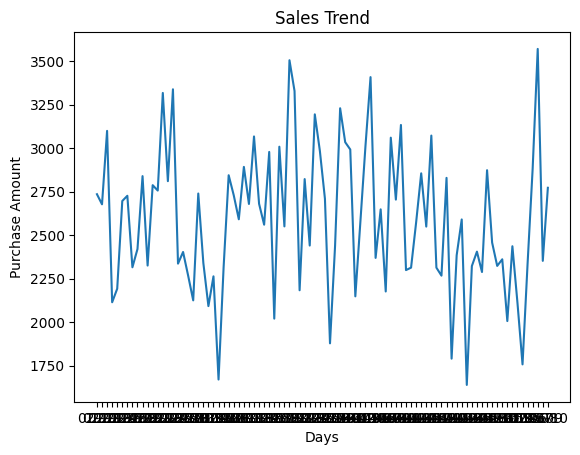

In [12]:
plt.plot(monthly_sales["Month_Day"],monthly_sales["Purchase Amount (USD)"])
plt.xlabel("Days")
plt.ylabel("Purchase Amount")
plt.title("Sales Trend")
plt.show()

In [13]:
# Customer segmentation by purchase frequency and amount
purchase_data['Purchase_Segment'] = pd.qcut(purchase_data['Purchase Amount (USD)'], 3, labels=['Low', 'Medium', 'High'])
customer_segments = purchase_data.groupby(['Purchase_Segment', 'Frequency of Purchases']).size().unstack(fill_value=0)
print("\nCustomer Segments by Purchase Amount and Frequency:")
customer_segments


Customer Segments by Purchase Amount and Frequency:


/tmp/ipykernel_619/1926125344.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_segments = purchase_data.groupby(['Purchase_Segment', 'Frequency of Purchases']).size().unstack(fill_value=0)


Frequency of Purchases,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly
Purchase_Segment,,,,,,,
Low,191,166,192,186,180,195,190
Medium,190,184,191,194,192,176,176
High,191,197,201,162,181,192,173


In [14]:
purchase_matrix = pd.crosstab(purchase_data['Customer ID'], purchase_data['Item Purchased'])
# Using Apriori algorithm
frequent_itemsets = apriori(purchase_matrix, min_support=0.1, use_colnames=True)

/workspace/.pyenv_mirror/user/current/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [15]:
if not frequent_itemsets.empty:
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
    print("Association Rules (customers who bought X also bought Y):")
    if not rules.empty:
        print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())
    else:
        print("No strong association rules found with current thresholds.")
else:
    print("No frequent itemsets found with current support threshold.")

No frequent itemsets found with current support threshold.


In [ ]:
# Category-based recommendation
def get_category_recommendations(category, purchase_data, n=3):
    category_products = purchase_data[purchase_data['Category'] == category]
    top_products = category_products.groupby('Item Purchased')['Purchase Amount (USD)'].count().sort_values(ascending=False)
    return top_products.head(n).index.tolist()

In [ ]:
print("Example Recommendations:")
Customer IDx = 5  
customer = purchase_data.iloc[Customer IDx]
print(f"For Customer {customer['Customer ID']} who purchased {customer['Item Purchased']}:")


Example Recommendations:
For Customer 6 who purchased Sneakers:


In [72]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
top_products['sum'].head(5).plot(kind='bar')
plt.title('Top 5 Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Total Revenue (USD)')

plt.subplot(1, 3, 2)
sns.histplot(purchase_data['Purchase Amount (USD)'], bins=10)
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
avg_ratings = purchase_data.groupby('Item Purchased')['Review Rating'].mean().sort_values(ascending=False).head(5)
avg_ratings.plot(kind='bar')
plt.title('Top 5 Products by Average Rating')
plt.xlabel('Product')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.savefig('purchase_analysis_visualizations.png')
plt.close()

print("\nData analysis complete and visualizations saved.")


Data analysis complete and visualizations saved.


In [ ]:
from collections import defaultdict

In [76]:
class SimpleProductRecommender:
    
    def __init__(self, purchase_data):
        self.data = purchase_data
        self.item_co_matrix = None
        self.category_top_items = None
        self.prepare_recommendation_data()
        
    def prepare_recommendation_data(self):       
        self._build_co_occurrence_matrix()       
        self._calculate_category_popularity()
        
    def _build_co_occurrence_matrix(self):
        customer_purchases = self.data.groupby('Customer ID')['Item Purchased'].apply(list).to_dict()
        co_matrix = defaultdict(lambda: defaultdict(int))
        for customer, items in customer_purchases.items():
            for i in range(len(items)):
                for j in range(len(items)):
                    if i != j: 
                        co_matrix[items[i]][items[j]] += 1
        
        self.item_co_matrix = co_matrix
        
    def _calculate_category_popularity(self):
        self.category_top_items = {}
        for category in self.data['Category'].unique():
            category_items = self.data[self.data['Category'] == category]
            top_items = category_items['Item Purchased'].value_counts().to_dict()
            self.category_top_items[category] = top_items
    
    def get_purchase_history_recommendations(self, item, top_n=3):
        if item not in self.item_co_matrix:
            return []
        co_occurrences = self.item_co_matrix[item]
        sorted_items = sorted(co_occurrences.items(), key=lambda x: x[1], reverse=True)
        return [item for item, count in sorted_items[:top_n]]
    
    def get_category_recommendations(self, category, exclude_items=None, top_n=3):
        if category not in self.category_top_items:
            return []        
        exclude_items = exclude_items or []
        sorted_items = sorted(self.category_top_items[category].items(), key=lambda x: x[1], reverse=True)
        filtered_items = [item for item, count in sorted_items if item not in exclude_items]     
        return filtered_items[:top_n]
    
    def get_segment_recommendations(self, age, gender, purchase_amount, top_n=3):
        age_range = (age - 10, age + 10)
        segments = pd.qcut(self.data['Purchase Amount (USD)'], 3, labels=['Low', 'Medium', 'High'])
        segment = pd.qcut([purchase_amount], 3, labels=['Low', 'Medium', 'High'])[0]
        similar_customers = self.data[
            (self.data['Age'] >= age_range[0]) & 
            (self.data['Age'] <= age_range[1]) & 
            (self.data['Gender'] == gender)
        ]
        
        if len(similar_customers) < 5:
            similar_customers = self.data[self.data['Gender'] == gender]
        top_items = similar_customers['Item Purchased'].value_counts().head(top_n).index.tolist()        
        return top_items
    
    def get_combined_recommendations(self, customer_id, top_n=5):
        customer_data = self.data[self.data['Customer ID'] == customer_id]     
        if customer_data.empty:
            return []
            
        customer = customer_data.iloc[0]
        purchased_items = set(self.data[self.data['Customer ID'] == customer_id]['Item Purchased'])
        recommendations = []

        for item in purchased_items:
            similar_items = self.get_purchase_history_recommendations(item, top_n=2)
            recommendations.extend(similar_items)
        categories = customer_data['Category'].unique()
        for category in categories:
            category_items = self.get_category_recommendations(
                category, exclude_items=purchased_items, top_n=2
            )
            recommendations.extend(category_items)
        segment_items = self.get_segment_recommendations(
            customer['Age'], customer['Gender'], customer['Purchase Amount (USD)'], top_n=2
        )
        recommendations.extend(segment_items)
        unique_recommendations = []
        seen = set(purchased_items)
        
        for item in recommendations:
            if item not in seen:
                unique_recommendations.append(item)
                seen.add(item)
                
                if len(unique_recommendations) >= top_n:
                    break
        
        return unique_recommendations


In [78]:
if __name__ == "__main__":

    import numpy as np

    items = ['Blouse', 'T-shirt', 'Jeans', 'Dress', 'Sweater', 'Jacket', 'Skirt', 'Shorts', 'Hoodie', 'Socks']
    categories = ['Clothing', 'Accessories', 'Footwear', 'Outerwear']
    genders = ['Male', 'Female', 'Non-binary']

    np.random.seed(42)
    data = []
    
    for i in range(1, 31): 
        num_purchases = np.random.randint(1, 6)
        
        for _ in range(num_purchases):
            age = np.random.randint(18, 75)
            gender = np.random.choice(genders)
            item = np.random.choice(items)
            category = np.random.choice(categories)
            purchase_amount = np.random.randint(10, 200)
            
            data.append({
                'Customer ID': i,
                'Age': age,
                'Gender': gender,
                'Item Purchased': item,
                'Category': category,
                'Purchase Amount (USD)': purchase_amount
            })
    
    purchase_data = pd.DataFrame(data)
    recommender = SimpleProductRecommender(purchase_data)
    print("Testing Recommender System\n")
    test_customer_id = 5
    recommendations = recommender.get_combined_recommendations(test_customer_id)
    customer_purchases = purchase_data[purchase_data['Customer ID'] == test_customer_id]['Item Purchased'].tolist()
    print(f"Customer {test_customer_id} purchased: {customer_purchases}")
    print(f"Recommended items: {recommendations}")
    print("\nTesting individual recommendation strategies:")
    
    if customer_purchases:
        purchase_recs = recommender.get_purchase_history_recommendations(customer_purchases[0])
        print(f"Based on {customer_purchases[0]}, we recommend: {purchase_recs}")
    
    customer_category = purchase_data[purchase_data['Customer ID'] == test_customer_id]['Category'].iloc[0]
    category_recs = recommender.get_category_recommendations(customer_category, exclude_items=customer_purchases)
    print(f"Top items in {customer_category}: {category_recs}")
    
    customer = purchase_data[purchase_data['Customer ID'] == test_customer_id].iloc[0]
    segment_recs = recommender.get_segment_recommendations(
        customer['Age'], customer['Gender'], customer['Purchase Amount (USD)']
    )
    print(f"Based on customer segment: {segment_recs}")

NameError: name 'defaultdict' is not defined